In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
dataset_path = "auto-insurance.csv"
df = pd.read_csv(
    dataset_path,
    names=[
        'n_claims',
        'total_payment'
    ]
)
df

,n_claims,total_payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   n_claims       63 non-null     int64  
 1   total_payment  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [4]:
df.describe()

,n_claims,total_payment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


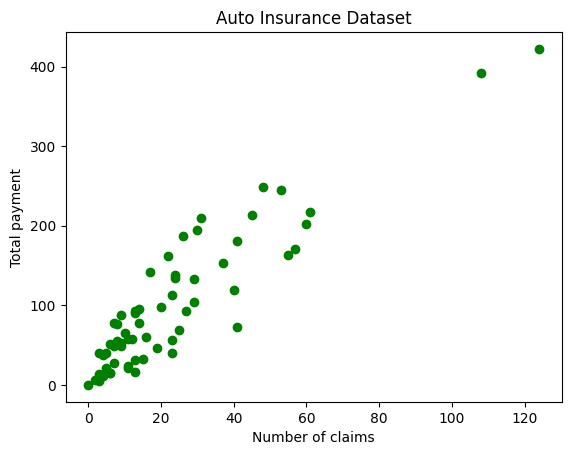

In [5]:
plt.scatter(df['n_claims'], df['total_payment'], color='green')
plt.title('Auto Insurance Dataset')
plt.xlabel('Number of claims')
plt.ylabel('Total payment')
plt.show()

In [6]:
noramlizer = StandardScaler()
df_normalizer = noramlizer.fit_transform(df)

In [7]:
X, y = df_normalizer[:, 0], df_normalizer[:, 1]
X = X.reshape(-1,1)

test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [8]:
regressor = SVR()
regressor.fit(X_train, y_train)

SVR()

In [9]:
y_pred = regressor.predict(X_val)
mae = mean_absolute_error(y_pred, y_val)
mse = mean_squared_error(y_pred, y_val)

print('Evaluation results on validation set :')
print(f'Mean Absolute Error : {mae}')
print(f'Mean Squared Error : {mse}')

Evaluation results on validation set :
Mean Absolute Error : 0.4549655045116023
Mean Squared Error : 0.5406791138567528
